# Lecture 2

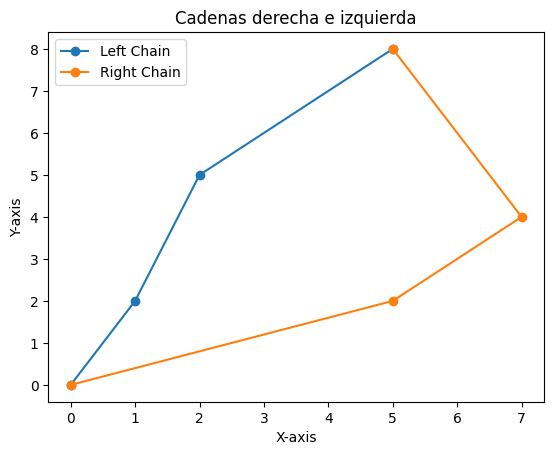

In [1]:
import matplotlib.pyplot as plt

# Coordinadas de las cadenas
left_chain = [(5,8), (2,5), (1, 2), (0,0)]

right_chain = [(5,8), (7,4), (5, 2), (0,0)]

left_x, left_y = zip(*left_chain)
right_x, right_y = zip(*right_chain)

# Plot left_chain right_chain
plt.plot(left_x, left_y, marker='o', linestyle='-', label='Left Chain')
plt.plot(right_x, right_y, marker='o', linestyle='-', label='Right Chain')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.title('Cadenas derecha e izquierda')
plt.legend()

plt.show()


[((7, 4), (2, 5)), ((1, 2), (7, 4)), ((5, 2), (1, 2))]


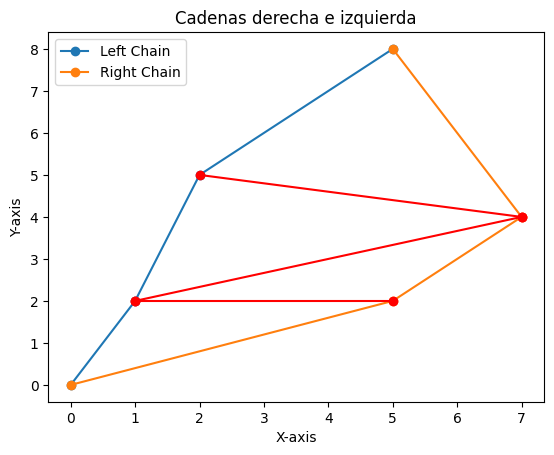

In [8]:
def cross_p(v0, v1, v2):
  """
  This function calculates the cross product of two vectors.

  Args:
    v0: A list of two elements representing the first vector.
    v1: A list of two elements representing the second vector.
    v2: A list of two elements representing the third vector.

  Returns:
    A float representing the cross product of the three vectors.
  """
  return (v0[0] * v1[1] - v0[1] * v1[0]) * (v0[0] * v2[1] - v0[1] * v2[0])

def triang_polyg_ymont(right_chain, left_chain):
  """
  This function finds the diagonals of a monotone polygon formed by concatenating two chains.

  Args:
      right_chain: A list of coordinates representing the right chain.
      left_chain: A list of coordinates representing the left chain.

  Returns:
      A list of diagonals of the polygon.
  """

  # Sort the combined chain by y-coordinate and then by x-coordinate
  u_list = sorted(left_chain + right_chain, key=lambda v: (-v[1], v[0]))

  # Remove the first and last duplicate points
  u_list = u_list[1:]

  # Initialize the stack with the first two points
  stack = u_list[:2]

  diagonals = []
  for vertex in u_list[2:]:
    cond_l = vertex in left_chain and stack[-1] in left_chain
    cond_r = vertex in right_chain and stack[-1] in right_chain

    if cond_l and len(stack) > 1:
      if cross_p(stack[-2], stack[-1], vertex) > 0:
        diagonals.append((stack[-2], vertex))
        stack.pop(-1)
      stack.append(vertex)

    elif cond_r and len(stack) > 1:
      if cross_p(stack[-2], stack[-1], vertex) < 0:
        diagonals.append((stack[-2], vertex))
        stack.pop(-1)
      stack.append(vertex)

    else:
      stack.pop(0)
      while len(stack) > 1:
        diagonals.append((vertex, stack[0]))
        stack.pop(0)
      diagonals.append((vertex, stack[0]))
      stack.append(vertex)

  return diagonals


# Example usage
left_chain = [(5, 8), (2, 5), (1, 2), (0, 0)]
right_chain = [(5, 8), (7, 4), (5, 2), (0, 0)]

diagonals = triang_polyg_ymont(right_chain, left_chain)
print(diagonals)

# Plot left_chain right_chain
plt.plot(left_x, left_y, marker='o', linestyle='-', label='Left Chain')
plt.plot(right_x, right_y, marker='o', linestyle='-', label='Right Chain')

# Plot diagonals
for diagonal in diagonals:
  x, y = zip(*diagonal)
  plt.plot(x, y, marker='o', linestyle='-', color='r')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.title('Cadenas derecha e izquierda')
plt.legend()

plt.show()

